Scikit-learn

教師あり学習  
線形回帰



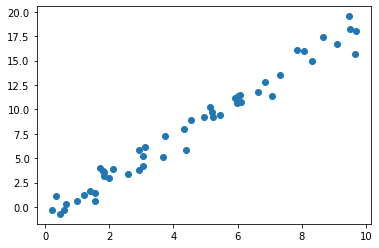

In [1]:
import matplotlib.pyplot as plt
import numpy as np

rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.randn(50)
plt.scatter(x, y);

1. モデルを選択  
→今回はロジスティック回帰  

モデル一覧  
https://nonbiri-tereka.hatenablog.com/entry/2015/02/16/081057

In [2]:
from sklearn.linear_model import LinearRegression

2. ハイパーパラメータを選択  
→今回はyの切片を近似する

In [3]:
model = LinearRegression(fit_intercept=True)
model
# LinearRegressionは目的変数が原点を必ず通るデータを使うときに利用

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

3. 目的変数と説明変数に分ける

In [10]:
X = x[:, np.newaxis]
X.shape
# numpyの1次元配列にする

(50, 1)

4. モデルをデータに適合する

In [11]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
# 回帰係数
model.coef_

array([1.9776566])

In [16]:
# 切片
model.intercept_
#→切片-1に近い

-0.9033107255311146

5. 未知のデータを予測

In [17]:
# データ用意
xfit = np.linspace(-1, 11)

In [19]:
# numpyの1次元配列に、.predict()で予測
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)

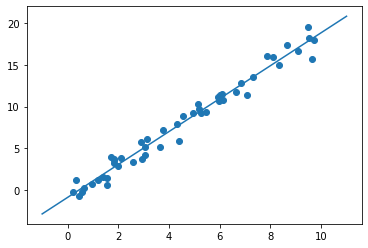

In [20]:
# 表示
plt.scatter(x, y)
plt.plot(xfit, yfit);

分類  
アイリスデータセットの例

In [25]:
# アイリスデータセット準備
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


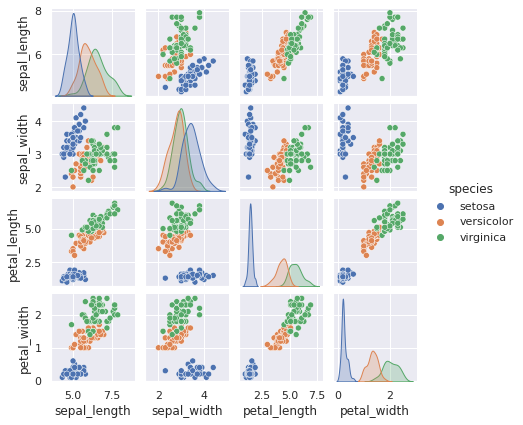

In [26]:
%matplotlib inline
import seaborn as sns; sns.set()
sns.pairplot(iris, hue='species', size=1.5);

In [27]:
# 目的変数と説明変数に分ける、今回はspeciesを分類する
X_iris = iris.drop('species', axis=1)
X_iris.shape

(150, 4)

In [28]:
y_iris = iris['species']
y_iris.shape

(150,)

In [30]:
# 学習データとテストデータに分割
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris, random_state=1)

In [31]:
from sklearn.naive_bayes import GaussianNB # 1
model = GaussianNB()                       # 2
model.fit(Xtrain, ytrain)                  # 3
y_model = model.predict(Xtest)             # 4

In [32]:
# 正解率
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.9736842105263158

教師なし学習  
主成分分析  
→次元削減してグラフ化

In [33]:
from sklearn.decomposition import PCA  # 1
model = PCA(n_components=2)            # 2
# 次元削減、n_componentsが次元数
model.fit(X_iris)                      # 3
X_2D = model.transform(X_iris)         # 4

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


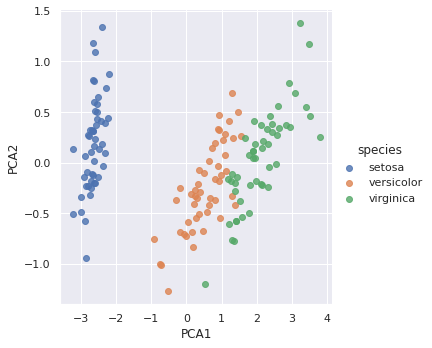

In [34]:
# グラフ化
iris['PCA1'] = X_2D[:, 0]
iris['PCA2'] = X_2D[:, 1]
sns.lmplot("PCA1", "PCA2", hue='species', data=iris, fit_reg=False);

クラスタリング  
→ガウス混合モデルを使う  
https://qiita.com/panda531/items/da283a5fee7e58c4cdc6

In [39]:
from sklearn import mixture      # 1
model = mixture.GaussianMixture(n_components=3, covariance_type='full')  # 2
# n_components→クラス数
model.fit(X_iris)                    # 3
y_gmm = model.predict(X_iris)        # 4

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


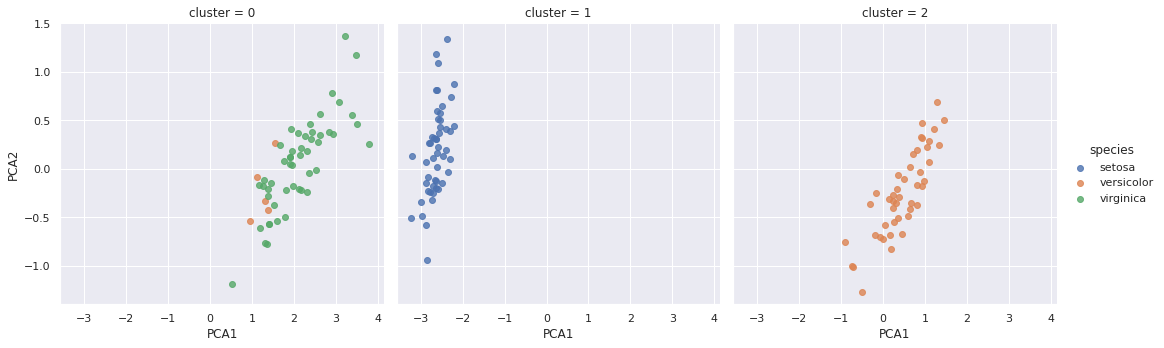

In [40]:
iris['cluster'] = y_gmm
sns.lmplot("PCA1", "PCA2", data=iris, hue='species', col='cluster', fit_reg=False);

手書き文字データ

In [41]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape

(1797, 8, 8)

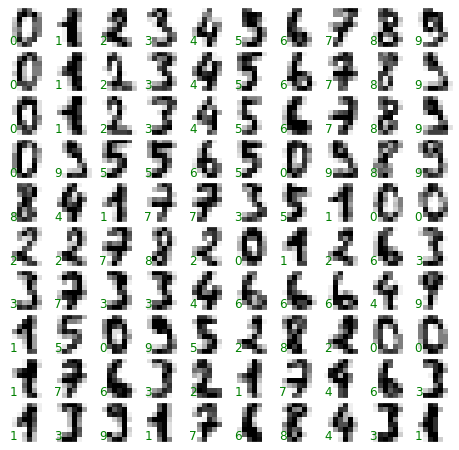

In [43]:
# データ読み込み、可視化
import matplotlib.pyplot as plt

fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
            transform=ax.transAxes, color='green')

In [44]:
X = digits.data
X.shape

(1797, 64)

In [45]:
y = digits.target
y.shape

(1797,)

手書き文字のデータの次元削減  
→ピクセル配列をフラットにすると64次元

In [46]:
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
iso.fit(digits.data)
data_projected = iso.transform(digits.data)
data_projected.shape

(1797, 2)

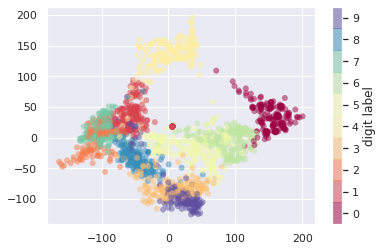

In [48]:
plt.scatter(data_projected[:, 0], data_projected[:, 1], c=digits.target,
            edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Spectral', 10))
plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5, 9.5);

数字の分類

In [49]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)

In [50]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

In [52]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)
# →8割しか正解できてない

0.8333333333333334

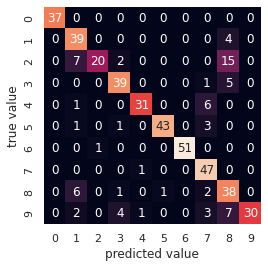

In [53]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(ytest, y_model)

sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');
# 不正解のラベルを確認

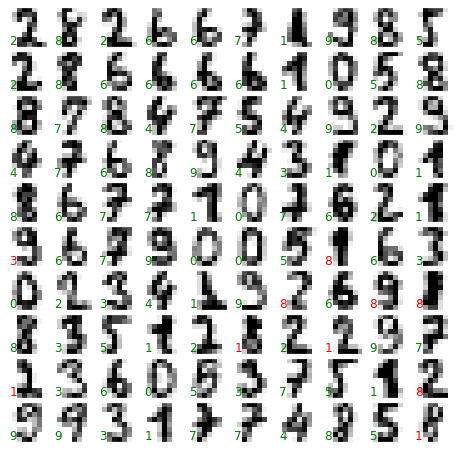

In [54]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

test_images = Xtest.reshape(-1, 8, 8)

for i, ax in enumerate(axes.flat):
    ax.imshow(test_images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(y_model[i]),
            transform=ax.transAxes,
            color='green' if (ytest[i] == y_model[i]) else 'red')